<a href="https://colab.research.google.com/github/nathasha-naranpanawa/COMP4702_2024/blob/main/PracW7_PyTorch_Version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# import pytorch libraries
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

print(torch.__version__)


2.2.1+cu121


In [3]:
# Optional to run code on GPU
# Check if CUDA is available and if device is GPU
print('Cuda Available : {}'.format(torch.cuda.is_available()))
#if (cuda.is_available) <- does not work
print('GPU - {0}'.format(torch.cuda.get_device_name()))

# Note:
# If this gives you an error on Google colab, go into 'Additional connection otions' > 'Change runtime type' > Select a GPU as the Hardware Accelerator
# If you're running code on your machine locally, your machine needs have a GPU supported graphics card and CUDA installed.

Cuda Available : True
GPU - Tesla T4


### Here's a great beginner tutorial for reference on how to train a classifier with PyTorch on image data: [Training a classifier](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html)

# Q3

In [4]:
# Load MNIST dataset
mnist_train = datasets.MNIST('data', train=True, download=True)
mnist_test = datasets.MNIST('data', train=False, download=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 16538134.01it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 504284.51it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 4441500.42it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 11005504.78it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



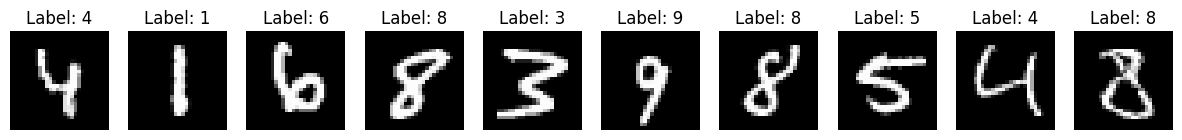

In [5]:
# visualise the dataset

import matplotlib.pyplot as plt

# Define a function to visualize images and their labels
def visualize_samples(dataset, num_samples=10):
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))
    for i in range(num_samples):
        idx = np.random.randint(0, len(dataset))
        image, label = dataset[idx]
        axes[i].imshow(image, cmap='gray')
        axes[i].set_title(f'Label: {label}')
        axes[i].axis('off')
    plt.show()

# Visualize samples from the training set
visualize_samples(mnist_train)

In [6]:
# Check MNIST statistics
print('Min Pixel Value: {} \nMax Pixel Value: {}'.format(mnist_train.data.min(), mnist_train.data.max()))
print('Mean Pixel Value {} \nPixel Values Std: {}'.format(mnist_train.data.float().mean(), mnist_train.data.float().std()))
print('Scaled Mean Pixel Value {} \nScaled Pixel Values Std: {}'.format(mnist_train.data.float().mean() / 255, mnist_train.data.float().std() / 255))

Min Pixel Value: 0 
Max Pixel Value: 255
Mean Pixel Value 33.31842041015625 
Pixel Values Std: 78.56748962402344
Scaled Mean Pixel Value 0.13066047430038452 
Scaled Pixel Values Std: 0.30810779333114624


In [21]:
# normalize and prepare data for training the model

# Define transformations
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert PIL Image to tensor
    transforms.Normalize((0.1307,), (0.3081,))  # Normalize the pixel values
])

# TODO: Load MNIST training dataset with transformations
mnist_train = datasets.MNIST('data', train=True, download=True, transform=transform)
mnist_train = datasets.MNIST('data', train=False, download=True, transform=transform)


# TODO: Split dataset into training, validation, and test sets
train_size = int(0.8 * len(mnist_train))
val_size = len(mnist_train) - train_size
mnist_train, mnist_val = random_split(mnist_train, [train_size, val_size])

# TODO: Define data loaders
train_loader = DataLoader(mnist_train, batch_size=50, shuffle=True)
val_loader = DataLoader(mnist_val, batch_size=50, shuffle=True)
test_loader = DataLoader(mnist_train, batch_size=50)

In [22]:
# TODO: Define MLP model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        #TODO: define the layers of the model here

        #Input layer
        self.flatten = nn.Flatten()

        #Hidden layers
        self.fc1 = nn.Linear(28*28, 512)
        self.fc2 = nn.Linear(512, 256)

        #Output layer
        self.output = nn.Linear(256, 10)
    def forward(self, x):
        #TODO: pass the data through each layer of the model here
        x = self.flatten(x)
        x = torch.relu(self.fc1(x)) # first hidden layer
        x = torch.relu(self.fc2(x)) # second hidden layer
        output = self.output(x)

        return x

In [9]:
!pip install tqdm

In [23]:
from tqdm import tqdm

# Initialize model
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = MLP().to(device)

# TODO: Define the following for your model
# loss function
loss_func = nn.CrossEntropyLoss()

# learning rate
learning_rate = 1e-4

# optimizer
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# number of epochs to train the model
num_epochs = 50


# Training loop
for epoch in range(num_epochs):
    # TODO: train the model
    model.train()
    for batch_idx, (data, targets) in enumerate(tqdm(train_loader, desc=f"Epoch {epoch+1}")):
      # get the inputs from train data loader
      # zero the parameter gradients
      optimizer.zero_grad()
      # forward pass through the model
      outputs = model(data.to(device))
      # backward propagation + optimize
      loss = loss_func(outputs, targets.to(device))
      loss.backward()
      optimizer.step()
      # print statistics

    # TODO: Validate the model
      # get inputs from validation data loader
      # forward pass + get predicted outputs
      # calculate accuracy of predictions
      # print statistics
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
      for data, targets in val_loader:
        outputs = model(data.to(device))
        _, predicted = torch.max(outputs, 1)
        predicted = predicted.cpu()
        total += targets.size(0)
        correct += (predicted == targets).sum().item()

    val_accuracy = 100 * correct / total

    # Print validation accuracy
    print(f"Epoch [{epoch+1}/{num_epochs}], Validation Accuracy: {val_accuracy:.2f}%")


Epoch 1: 100%|██████████| 160/160 [00:01<00:00, 80.18it/s]


Epoch [1/50], Validation Accuracy: 1.90%


Epoch 2: 100%|██████████| 160/160 [00:02<00:00, 77.16it/s]


Epoch [2/50], Validation Accuracy: 4.60%


Epoch 3: 100%|██████████| 160/160 [00:02<00:00, 67.17it/s]


Epoch [3/50], Validation Accuracy: 12.00%


Epoch 4: 100%|██████████| 160/160 [00:01<00:00, 82.99it/s]


Epoch [4/50], Validation Accuracy: 19.50%


Epoch 5: 100%|██████████| 160/160 [00:01<00:00, 83.32it/s]


Epoch [5/50], Validation Accuracy: 25.75%


Epoch 6: 100%|██████████| 160/160 [00:01<00:00, 84.95it/s]


Epoch [6/50], Validation Accuracy: 30.00%


Epoch 7: 100%|██████████| 160/160 [00:02<00:00, 76.01it/s]


Epoch [7/50], Validation Accuracy: 33.15%


Epoch 8: 100%|██████████| 160/160 [00:02<00:00, 71.52it/s]


Epoch [8/50], Validation Accuracy: 36.15%


Epoch 9: 100%|██████████| 160/160 [00:01<00:00, 83.46it/s]


Epoch [9/50], Validation Accuracy: 38.05%


Epoch 10: 100%|██████████| 160/160 [00:01<00:00, 81.10it/s]


Epoch [10/50], Validation Accuracy: 40.30%


Epoch 11: 100%|██████████| 160/160 [00:01<00:00, 85.10it/s]


Epoch [11/50], Validation Accuracy: 41.95%


Epoch 12: 100%|██████████| 160/160 [00:02<00:00, 72.76it/s]


Epoch [12/50], Validation Accuracy: 43.45%


Epoch 13: 100%|██████████| 160/160 [00:02<00:00, 72.53it/s]


Epoch [13/50], Validation Accuracy: 45.15%


Epoch 14: 100%|██████████| 160/160 [00:01<00:00, 84.10it/s]


Epoch [14/50], Validation Accuracy: 46.85%


Epoch 15: 100%|██████████| 160/160 [00:01<00:00, 85.36it/s]


Epoch [15/50], Validation Accuracy: 48.60%


Epoch 16: 100%|██████████| 160/160 [00:01<00:00, 84.78it/s]


Epoch [16/50], Validation Accuracy: 50.15%


Epoch 17: 100%|██████████| 160/160 [00:02<00:00, 73.11it/s]


Epoch [17/50], Validation Accuracy: 51.75%


Epoch 18: 100%|██████████| 160/160 [00:02<00:00, 73.14it/s]


Epoch [18/50], Validation Accuracy: 53.80%


Epoch 19: 100%|██████████| 160/160 [00:01<00:00, 85.08it/s]


Epoch [19/50], Validation Accuracy: 56.15%


Epoch 20: 100%|██████████| 160/160 [00:01<00:00, 83.89it/s]


Epoch [20/50], Validation Accuracy: 58.25%


Epoch 21: 100%|██████████| 160/160 [00:01<00:00, 85.73it/s]


Epoch [21/50], Validation Accuracy: 60.70%


Epoch 22: 100%|██████████| 160/160 [00:02<00:00, 70.74it/s]


Epoch [22/50], Validation Accuracy: 62.85%


Epoch 23: 100%|██████████| 160/160 [00:02<00:00, 77.29it/s]


Epoch [23/50], Validation Accuracy: 64.60%


Epoch 24: 100%|██████████| 160/160 [00:01<00:00, 84.67it/s]


Epoch [24/50], Validation Accuracy: 66.65%


Epoch 25: 100%|██████████| 160/160 [00:01<00:00, 84.57it/s]


Epoch [25/50], Validation Accuracy: 68.25%


Epoch 26: 100%|██████████| 160/160 [00:01<00:00, 82.45it/s]


Epoch [26/50], Validation Accuracy: 69.85%


Epoch 27: 100%|██████████| 160/160 [00:02<00:00, 70.18it/s]


Epoch [27/50], Validation Accuracy: 71.25%


Epoch 28: 100%|██████████| 160/160 [00:02<00:00, 77.79it/s]


Epoch [28/50], Validation Accuracy: 73.00%


Epoch 29: 100%|██████████| 160/160 [00:01<00:00, 87.29it/s]


Epoch [29/50], Validation Accuracy: 74.40%


Epoch 30: 100%|██████████| 160/160 [00:01<00:00, 83.16it/s]


Epoch [30/50], Validation Accuracy: 75.25%


Epoch 31: 100%|██████████| 160/160 [00:01<00:00, 84.24it/s]


Epoch [31/50], Validation Accuracy: 75.70%


Epoch 32: 100%|██████████| 160/160 [00:02<00:00, 72.06it/s]


Epoch [32/50], Validation Accuracy: 76.40%


Epoch 33: 100%|██████████| 160/160 [00:02<00:00, 79.96it/s]


Epoch [33/50], Validation Accuracy: 77.00%


Epoch 34: 100%|██████████| 160/160 [00:01<00:00, 84.32it/s]


Epoch [34/50], Validation Accuracy: 77.20%


Epoch 35: 100%|██████████| 160/160 [00:01<00:00, 87.00it/s]


Epoch [35/50], Validation Accuracy: 77.20%


Epoch 36: 100%|██████████| 160/160 [00:01<00:00, 87.20it/s]


Epoch [36/50], Validation Accuracy: 77.50%


Epoch 37: 100%|██████████| 160/160 [00:02<00:00, 71.16it/s]


Epoch [37/50], Validation Accuracy: 77.70%


Epoch 38: 100%|██████████| 160/160 [00:02<00:00, 79.28it/s]


Epoch [38/50], Validation Accuracy: 78.00%


Epoch 39: 100%|██████████| 160/160 [00:01<00:00, 83.47it/s]


Epoch [39/50], Validation Accuracy: 78.40%


Epoch 40: 100%|██████████| 160/160 [00:01<00:00, 87.11it/s]


Epoch [40/50], Validation Accuracy: 78.95%


Epoch 41: 100%|██████████| 160/160 [00:01<00:00, 82.82it/s]


Epoch [41/50], Validation Accuracy: 79.25%


Epoch 42: 100%|██████████| 160/160 [00:02<00:00, 75.61it/s]


Epoch [42/50], Validation Accuracy: 79.65%


Epoch 43: 100%|██████████| 160/160 [00:02<00:00, 75.89it/s]


Epoch [43/50], Validation Accuracy: 80.00%


Epoch 44: 100%|██████████| 160/160 [00:01<00:00, 88.41it/s]


Epoch [44/50], Validation Accuracy: 80.10%


Epoch 45: 100%|██████████| 160/160 [00:01<00:00, 86.61it/s]


Epoch [45/50], Validation Accuracy: 80.30%


Epoch 46: 100%|██████████| 160/160 [00:01<00:00, 87.90it/s]


Epoch [46/50], Validation Accuracy: 80.45%


Epoch 47: 100%|██████████| 160/160 [00:02<00:00, 69.59it/s]


Epoch [47/50], Validation Accuracy: 80.60%


Epoch 48: 100%|██████████| 160/160 [00:01<00:00, 86.29it/s]


Epoch [48/50], Validation Accuracy: 80.75%


Epoch 49: 100%|██████████| 160/160 [00:01<00:00, 86.24it/s]


Epoch [49/50], Validation Accuracy: 81.15%


Epoch 50: 100%|██████████| 160/160 [00:01<00:00, 86.85it/s]


Epoch [50/50], Validation Accuracy: 81.30%


Epoch [1/50], Train Loss: 0.9727, Train Acc: 82.10%, Val Loss: 0.9923, Val Acc: 81.20%
Epoch [2/50], Train Loss: 0.9584, Train Acc: 82.19%, Val Loss: 0.9780, Val Acc: 81.35%
Epoch [3/50], Train Loss: 0.9447, Train Acc: 82.36%, Val Loss: 0.9643, Val Acc: 81.50%
Epoch [4/50], Train Loss: 0.9315, Train Acc: 82.61%, Val Loss: 0.9509, Val Acc: 81.60%
Epoch [5/50], Train Loss: 0.9188, Train Acc: 82.75%, Val Loss: 0.9382, Val Acc: 81.75%
Epoch [6/50], Train Loss: 0.9065, Train Acc: 82.84%, Val Loss: 0.9259, Val Acc: 81.85%
Epoch [7/50], Train Loss: 0.8947, Train Acc: 82.88%, Val Loss: 0.9141, Val Acc: 81.95%
Epoch [8/50], Train Loss: 0.8833, Train Acc: 83.08%, Val Loss: 0.9026, Val Acc: 82.05%
Epoch [9/50], Train Loss: 0.8723, Train Acc: 83.16%, Val Loss: 0.8916, Val Acc: 82.15%
Epoch [10/50], Train Loss: 0.8617, Train Acc: 83.21%, Val Loss: 0.8809, Val Acc: 82.30%
Epoch [11/50], Train Loss: 0.8514, Train Acc: 83.25%, Val Loss: 0.8706, Val Acc: 82.35%
Epoch [12/50], Train Loss: 0.8414, Train 

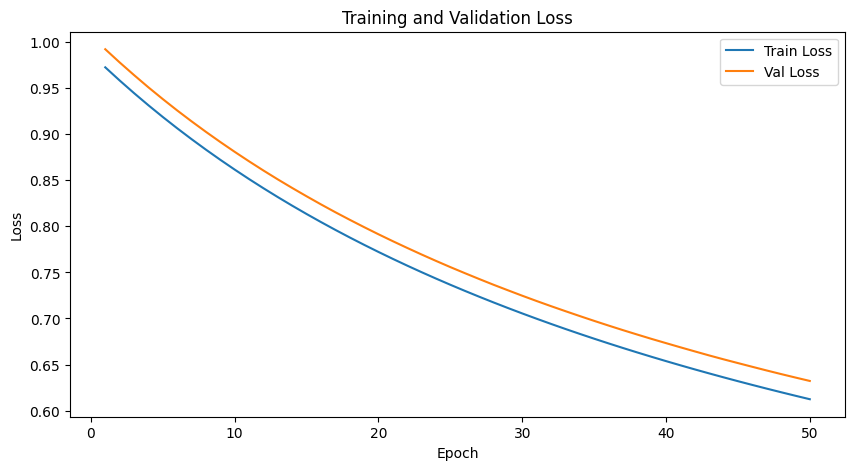

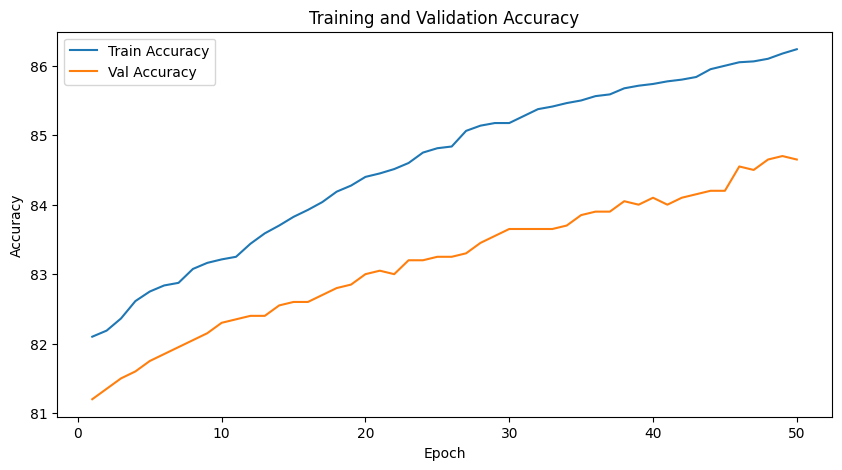

In [24]:
# TODO: Show loss and accuracy plots
import numpy as np
import matplotlib.pyplot as plt

# Initialize empty lists to store metrics
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Training loop
for epoch in range(num_epochs):
    # Train the model
    model.train()
    for batch_idx, (data, targets) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(data.to(device))
        loss = loss_func(outputs, targets.to(device))
        loss.backward()
        optimizer.step()

    # Validate the model
    model.eval()
    train_correct = 0
    val_correct = 0
    train_total = 0
    val_total = 0
    train_loss_total = 0
    val_loss_total = 0
    with torch.no_grad():
        for data, targets in train_loader:
            outputs = model(data.to(device))
            train_loss = loss_func(outputs, targets.to(device))
            train_loss_total += train_loss.item()
            _, train_predicted = torch.max(outputs, 1)
            train_total += targets.size(0)
            train_correct += (train_predicted == targets.to(device)).sum().item()
        for data, targets in val_loader:
            outputs = model(data.to(device))
            val_loss = loss_func(outputs, targets.to(device))
            val_loss_total += val_loss.item()
            _, val_predicted = torch.max(outputs, 1)
            val_total += targets.size(0)
            val_correct += (val_predicted == targets.to(device)).sum().item()

    # Calculate metrics
    train_loss_avg = train_loss_total / len(train_loader)
    val_loss_avg = val_loss_total / len(val_loader)
    train_accuracy = 100 * train_correct / train_total
    val_accuracy = 100 * val_correct / val_total

    # Append metrics to lists
    train_losses.append(train_loss_avg)
    val_losses.append(val_loss_avg)
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

    # Print epoch statistics
    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss_avg:.4f}, Train Acc: {train_accuracy:.2f}%, Val Loss: {val_loss_avg:.4f}, Val Acc: {val_accuracy:.2f}%")

# Plot loss and accuracy curves
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [25]:
# Evaluate the model on the test data
model.eval()
test_correct = 0
test_total = 0
with torch.no_grad():
    for data, targets in test_loader:
        outputs = model(data.to(device))
        _, predicted = torch.max(outputs, 1)
        test_total += targets.size(0)
        test_correct += (predicted == targets.to(device)).sum().item()

# Calculate test accuracy
test_accuracy = 100 * test_correct / test_total

# Print test accuracy
print(f"Test Accuracy: {test_accuracy:.2f}%")

Test Accuracy: 86.24%


# Q4

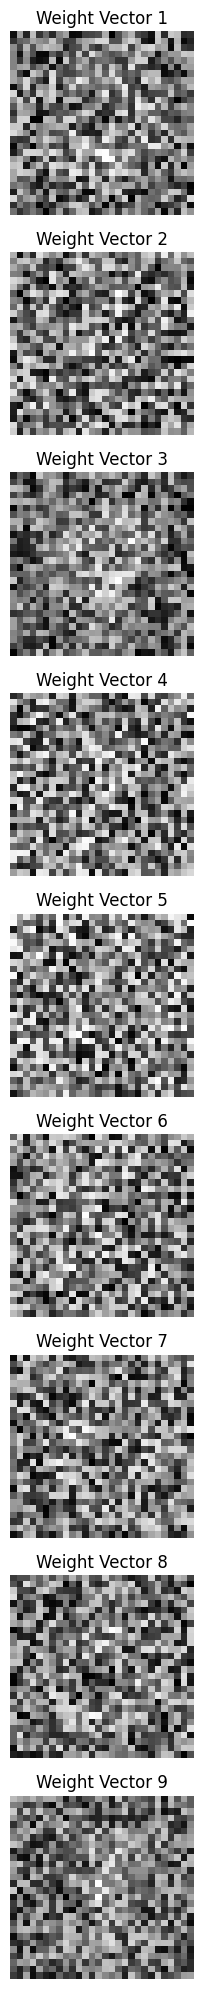

In [26]:
# TODO: Extract the weight matrix of the first hidden layer
weight_matrix_fc1 = model.fc1.weight.detach().cpu().numpy()

# TODO: Normalize each row of the weight matrix to [0, 1]
normalized_weight_matrix = (weight_matrix_fc1 - weight_matrix_fc1.min(axis=1, keepdims=True)) / (weight_matrix_fc1.max(axis=1, keepdims=True) - weight_matrix_fc1.min(axis=1, keepdims=True))

# Visualize the first 9 rows of the normalized weight matrix
num_rows_to_visualize = 9
fig, axes = plt.subplots(num_rows_to_visualize, 1, figsize=(10, 20))
for i in range(num_rows_to_visualize):
    axes[i].imshow(normalized_weight_matrix[i].reshape(28, 28), cmap='gray')
    axes[i].set_title(f'Weight Vector {i+1}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()